In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Импорт библиотеки

In [3]:
import cv2

## Основные возможности библиотеки 🤓

### Чтение изображения

In [4]:
image = cv2.imread('/content/drive/MyDrive/bobby.jpg') # BGR, cv2.Mat, np.ndarray

Получение доступа к значению пикселя осуществляется по координатам его строки и столбца (не забываем, что картинка - это матрица! 👀). Для изображения в цветовом пространстве BGR возвращается массив значений `[Blue, Green, Red]`. Для изображения в оттенках серого (одноканальное изображение) возвращается только одна соответствующая интенсивность цвета.

In [5]:
pixel = image[100, 100]
print(pixel)

# доступ только к компоненте Blue
blue_pixel = image[100, 100, 0]
print(blue_pixel)

[19 45 81]
19


Используя обращение по индексу, можно менять значения пикселей

In [6]:
image[100, 100] = [255, 255, 255]

print(image[100, 100])

[255 255 255]


**Примечание**

Простой доступ к каждому значению пикселя и его изменение будет очень медленной операцией! Вышеупомянутый метод, как правило, используется для получения среза. Для доступа к отдельным пикселям и изменения значения отдельных пикселей используются методы NumPy - `item` и `itemset`. Однако, они всегда возвращают скаляр, поэтому, если вы хотите получить доступ ко всем значениям B, G, R, то вам нужно будет вызвать `item` отдельно для каждого значения.

In [7]:
# доступ к компоненте Red

image.item(10, 10, 2)

82

In [8]:
image.itemset((10, 10, 2), 100)
image.item(10, 10, 2)

100

### Доступ к свойствам изображения

К свойствам изображения относятся: количество строк, столбцов, каналов; тип данных изображения; количество пикселей и т.п.

Для получения информации о форме изображения используют атрибут `shape`. Он возвращает кортеж `(количество строк, количество столбцов, [количество каналов])`.

In [9]:
print(image.shape)

(720, 1280, 3)


**Примечание**

Если исходное изображение в оттенках серого, то возвращаемый кортеж содержит только количество строк и столбцов.

Для получения всего количества пикселей изображения используется атрибут `size`.

In [10]:
print(image.size)

2764800


Для получения типа данных изображения используется атрибут `dtype`.

In [11]:
print(image.dtype)

uint8


**Примечание**

`image.dtype` очень важен при отладке, потому что большое количество ошибок в коде на OpenCV вызвано использованием недопустимого типа данных.

### Срез по изображению

Зачастую приходится работать с определенными областями на изображении. Например, для обнаружения лица на изображении сначала выполняется процедура поиска лица по всему изображению. Когда получена область с лицом, используя ее мы ищем глаза. Нам не нужно делать поиск по всему изображению. Во-первых, такой подход повышает точность (потому что глаза всегда на лице...), во-вторых, это повышает производительность (поиск в небольшой области).

Срез по изображению реализуется с помощью индексации NumPy.

In [12]:
something = image[100:250, 300:450]
image[250:400, 100:250] = something

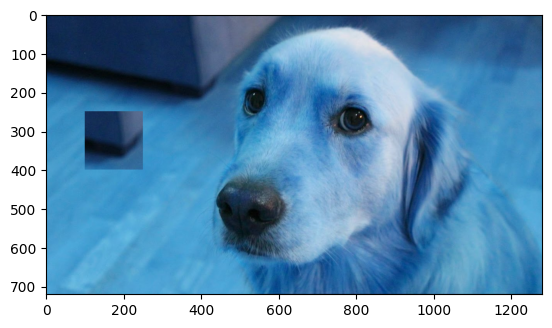

In [13]:
import matplotlib.pyplot as plt

plt.imshow(image)

### Разделение и объединение каналов изображения

Иногда возникает необходимость работать отдельно с B, G, R каналами изображения. В этом случае вам необходимо разбить BGR-изображение на отдельные каналы. В других ситуациях вам может потребоваться объединение этих отдельных каналов для создания BGR-образа.

In [14]:
b, g, r = cv2.split(image)

print(b.shape)

(720, 1280)


In [15]:
image = cv2.merge((b, g, r))

print(image.shape)

(720, 1280, 3)


Есть альтернатива для разделения каналов (выбора нужного канала)

In [16]:
b = image[:, :, 0]

print(b.shape)

(720, 1280)


Если вдруг вам потребовалось установить все значения в каком-либо канале на заданное значение, то для этого не нужно предварительно разделять изображение на каналы. Использование индексации NumPy позволит выполнить такую операцию быстрее.

In [17]:
image[:, :, 2] = 0

### Арифметические операции над изображениями


Будем рассматривать
*   операция сложения
*   операция вычитания
*   битовые операции



#### Сложение двух изображений

Складывать два изображения можно либо с помощью функции OpenCV `add`, либо с помощью операции NumPy `+`. Оба изображения должны быть одинаковой глубины и типа, либо второе изображение может быть просто скаляром.

**Примечание**

Существует разница между операциями сложения в OpenCV и NumPy. Сложение в NumPy - модульное, а в OpenCV - нет.

In [18]:
import numpy as np

x = np.uint8([250])
y = np.uint8([10])

# num % mod
print(cv2.add(x, y), x + y)

[[255]] [4]


Результат будет более заметен, когда вы будете работать с изображениями. Поэтому старайтесь использовать для сложения двух изображений `add` из OpenCV.

#### Смешивание изображений

По сути представляет собой сложение изображений, но каждому изображению присваивается свой вес для создания ощущения прозрачности 🫥.

При смешивании изображения суммируются в соответствии с формулой:

`result_image = (1 - alpha) * image_1 + alpha * image_2 + gamma`

Путем изменения `alpha` вы можете регулировать переход от одного изображения к другому.

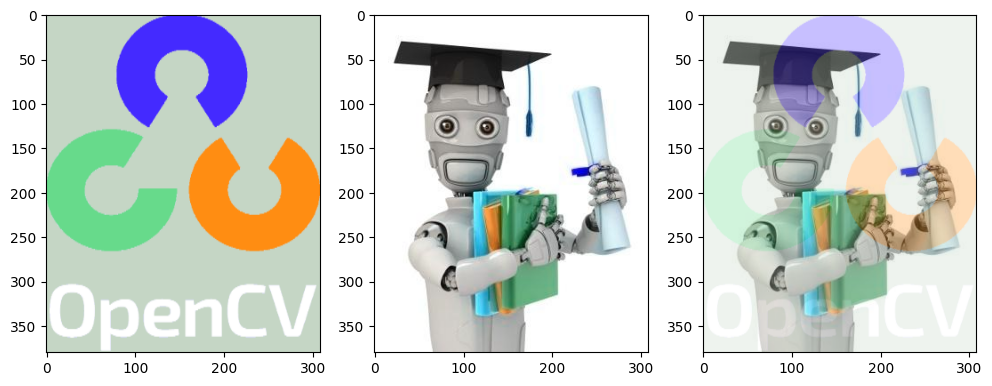

In [19]:
image_1 = cv2.imread("/content/drive/MyDrive/OpenCV_logo_white_.png")
image_2 = cv2.imread("/content/drive/MyDrive/ml.png")

dst = cv2.addWeighted(image_1, 0.3, image_2, 0.7, 0)

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_1)
plt.subplot(1, 3, 2)
plt.imshow(image_2)
plt.subplot(1, 3, 3)
plt.imshow(dst)

#### Битовые операции

В класс битовых операций влючаются операции `AND`, `OR`, `NOT` и `XOR`. Как правило, они полезны при извлечении частей изображения, определении и работе с непрямоугольными срезами по изображению.

Поместим логотип OpenCV в левый верхний угол изображения. Если сложить два изображения, то произойдет изменение цвета, если их смешать, то возникнет эффект прозрачности. Если бы это была прямоугольная область, то можно было бы воспользоваться срезами, но логотип имеет произвольную форму. Желаемый результат можно получить, используя битовые операции.

In [20]:
image_1 = cv2.imread("/content/drive/MyDrive/bobby.jpg")
image_2 = cv2.imread("/content/drive/MyDrive/OpenCV_logo_white_.png")

In [21]:
rows, columns, channels = image_2.shape
roi = image_1[0:rows, 0:columns]

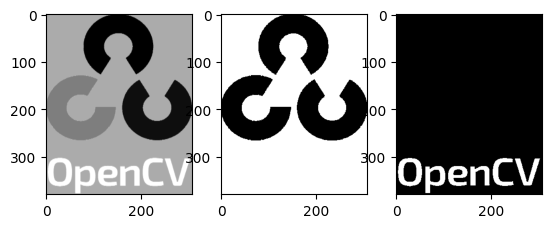

In [22]:
image_to_gray = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
ret, mask_logo = cv2.threshold(image_to_gray, 200, 255, cv2.THRESH_BINARY) # 200 - пороговое значение, 255 - на что меняем; возвращает пороговое значение и маску
ret, mask_text = cv2.threshold(image_to_gray, 240, 255, cv2.THRESH_BINARY) # 2400 - пороговое значение, 255 - на что меняем; возвращает пороговое значение и маску

plt.subplot(1, 3, 1)
plt.imshow(image_to_gray, "gray")
plt.subplot(1, 3, 2)
plt.imshow(mask_logo, "gray")
plt.subplot(1, 3, 3)
plt.imshow(mask_text, "gray")

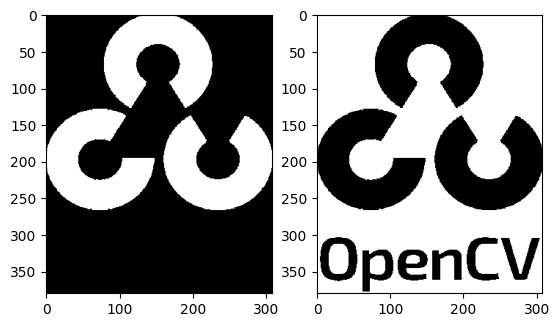

In [23]:
mask_inv = cv2.bitwise_not(mask_logo)
plt.subplot(1, 2, 1)
plt.imshow(mask_inv, "gray")

result_mask = cv2.bitwise_not(cv2.bitwise_or(mask_inv, mask_text))
plt.subplot(1, 2, 2)
plt.imshow(result_mask, "gray")

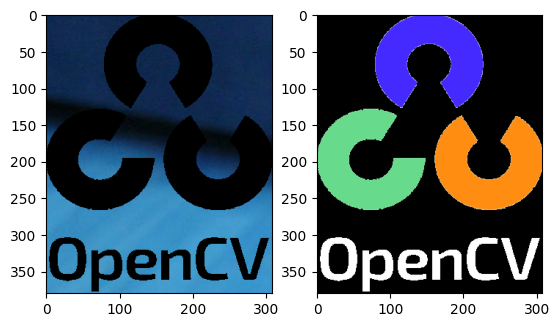

In [24]:
image_1_bg = cv2.bitwise_and(roi, roi, mask=result_mask) # логическое и изображения с собой же
plt.subplot(1, 2, 1)
plt.imshow(image_1_bg, "gray")

image_2_fg = cv2.bitwise_and(image_2, image_2, mask=cv2.bitwise_not(result_mask))
plt.subplot(1, 2, 2)
plt.imshow(image_2_fg, "gray")

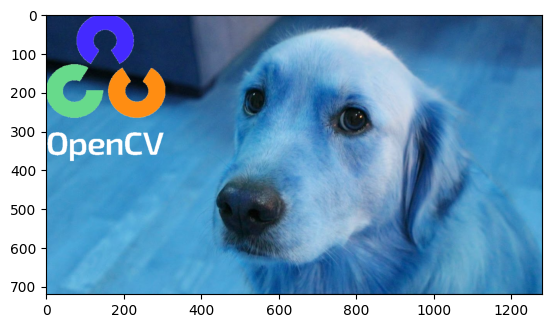

In [25]:
image_1[0:rows, 0:columns] = cv2.add(image_1_bg, image_2_fg)
plt.imshow(image_1, "gray")

### Смена цветового пространства

В OpenCV доступно более 150 методов преобразования цветового пространства. Мы ограничимся рассмотрением одного наиболее широкоиспользуемого `BGR <-> Gray`.

Для конвертации из одного цветового пространства в другое цветовое пространство в OpenCV используют функцию `cv2.cvtColor(input_image, flag)`, где `flag` - это режим конвертации (из какого цветового пространства и в какое конвертируем).

Для конвертации `BGR -> Gray` используется фалг `cv2.COLOR_BGR2GRAY`.

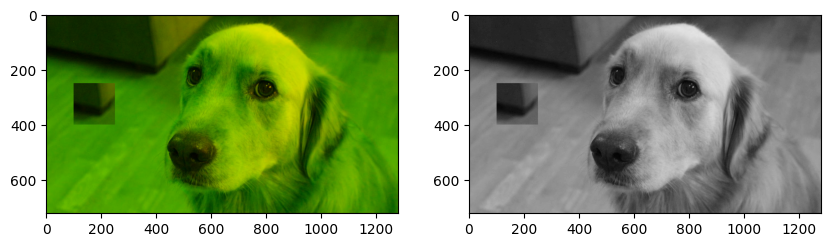

In [26]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, "gray")
plt.subplot(1, 2, 2)
plt.imshow(gray_image, "gray")

In [27]:
gray_image.shape

(720, 1280)

In [29]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rgb_image.shape

(720, 1280, 3)

## Преобразования над изображением

### Масштабирование

Масштабирование — это простое изменение размера изображения (без явного изменения контента - ничего не вырезается и т.п.). В OpenCV для масштабирования изображения используется функция `resize`, которая на вход принимает исходное изображение, желаемые размеры (или же коэффициент(ы) масштабирования) и метод интерполяции (необязательный параметр). По умолчанию для интерполяции используется метод `cv2.INTER_LINEAR`.

(720, 1280, 3) (1440, 2560, 3)


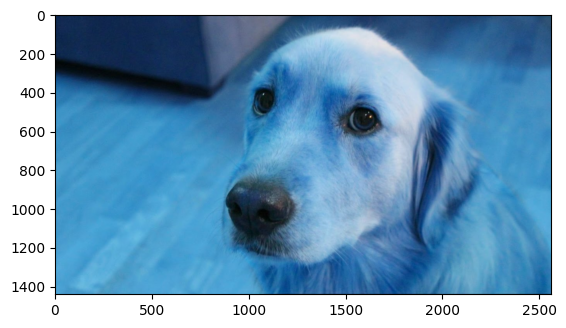

In [30]:
import numpy as np
import cv2

image = cv2.imread("/content/drive/MyDrive/bobby.jpg")
result = cv2.resize(image, dsize=None, fx=2, fy=2) # увеличили размеры картинки в 2 раза

print(image.shape, result.shape)
plt.imshow(result, "gray")

Можно явно указать желаемый размер (пропорция сторон не обязательно должна сохраняться).

(720, 1280, 3) (1080, 1920, 3)


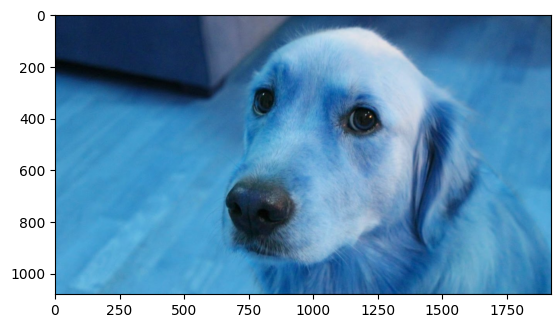

In [33]:
result = cv2.resize(image, (1920, 1080))

print(image.shape, result.shape)
plt.imshow(result, "gray")

### Смещение

Для смещения изображения по $(x, y)$ мы можем задать матрицу сдвига следующего вида:

$M=\begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$

Здесь $t$ задает сдвиги по соответствующим осям.

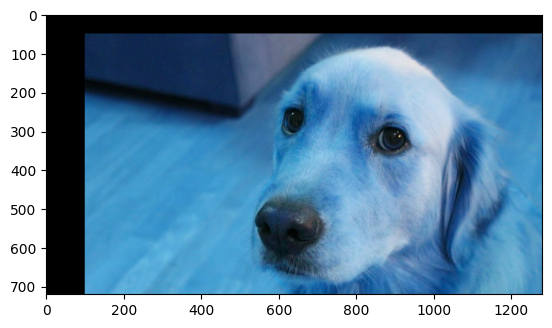

In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("/content/drive/MyDrive/bobby.jpg")
rows, columns, _ = image.shape

M = np.float32([[1, 0, 100], [0, 1, 50]])
dst = cv2.warpAffine(image, M, (columns, rows))

plt.imshow(dst, "gray")

**Примечание**

Третий аргумент функции `warpAffine` — это размер выходного изображения, который задается в виде (ширина, высота). Помните, что ширина `==` количеству столбцов, а высота `==` количеству строк.

### Вращение

Поворот изображения на угол θ достигается матрицей преобразования вида (есть нюансы, более подробно см. документацию):

$M=\begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$

Чтобы найти матрицу преобразования, OpenCV предоставляет функцию `getRotationMatrix2D`.

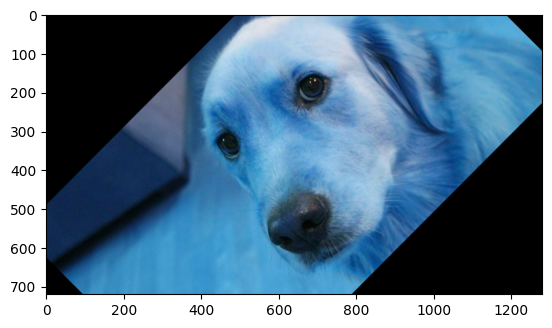

In [35]:
image = cv2.imread("/content/drive/MyDrive/bobby.jpg")
rows, columns, _ = image.shape

M = cv2.getRotationMatrix2D(((columns - 1) / 2.0, (rows - 1) / 2.0), 45, 1) # центр, относительно которого поворачивается изображение; угол; коэффициент масштабирования
dst = cv2.warpAffine(image, M, (columns, rows))

plt.imshow(dst)

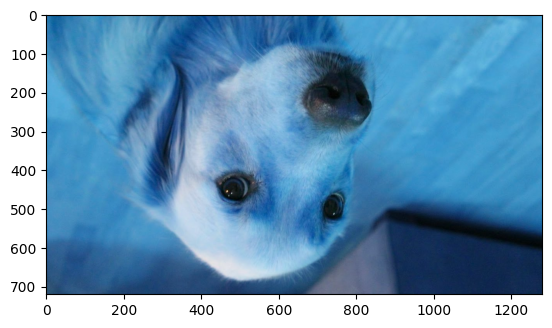

In [36]:
image = cv2.imread("/content/drive/MyDrive/bobby.jpg")
rows, columns, _ = image.shape

M = cv2.getRotationMatrix2D(((columns - 1) / 2.0, (rows - 1) / 2.0), 180, 1) # центр, относительно которого поворачивается изображение; угол; коэффициент масштабирования
dst = cv2.warpAffine(image, M, (columns, rows))

plt.imshow(dst)

## Пороговая обработка

Как работает в простейшем случае?

---



Устанавливается пороговое значение, для каждого пикселя оно одно и то же. Если значение пикселя меньше порогового значения, то устанавливаем значение пикселя в 0, в противном случае устанавливается максимальное заданное значение.

В OpenCV для применения пороговой обработки используется функция `threshold`. Первый аргумент функции — это исходное изображение, которое должно быть конвертировано в оттенки серого. Второй аргумент — это пороговое значение, которое используется для классификации значений пикселей. Третий аргумент — это максимальное значение, которое присваивается значениям пикселей, превышающим пороговое значение. OpenCV предоставляет различные типы пороговых значений, которые задаются четвертым параметром функции. Базовое пороговое значение, соответствующее описанию выше, выполняется с использованием типа `cv2.THRESH_BINARY`. Подробности и более **умные (~~замороченные~~)** пороговые обработки можно найти в документации ✌


&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Mode &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Condition  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
-------------------|-------------------------
cv2.THRESH_BINARY       | $dst(x,y)=\begin{cases} maxval,  & \mbox{if } src(x,y) \mbox{ > thresh} \\ 0, & \mbox{ } \mbox{ otherwise}
\end{cases}$
cv2.THRESH_BINARY_INV       | $dst(x,y)=\begin{cases}
  0,  & \mbox{if } src(x,y) \mbox{ > thresh} \\
  maxval, & \mbox{ } \mbox{ otherwise}
\end{cases}$
cv2.THRESH_TRUNC| $dst(x,y)=\begin{cases}
  threshold,  & \mbox{if } src(x,y) \mbox{ > thresh} \\
  src(x, y), & \mbox{ } \mbox{ otherwise}
\end{cases}$
cv2.THRESH_TOZERO| $dst(x,y)=\begin{cases}
  src(x, y),  & \mbox{if } src(x,y) \mbox{ > thresh} \\
  0, & \mbox{ } \mbox{ otherwise}
\end{cases}$
cv2.THRESH_TOZERO_INV| $dst(x,y)=\begin{cases}
  0,  & \mbox{if } src(x,y) \mbox{ > thresh} \\
  src(x, y), & \mbox{ } \mbox{ otherwise}
\end{cases}$


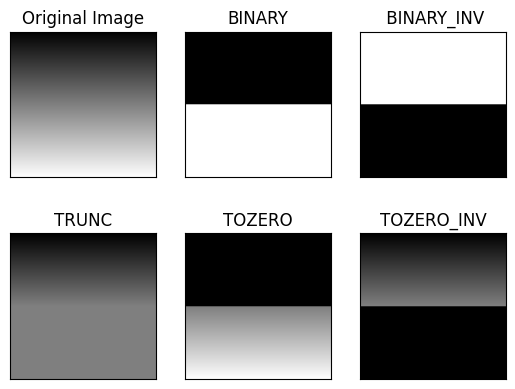

In [37]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread('/content/drive/MyDrive/gradient.png')

ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY',' BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

## Сглаживание изображений

Размытие изображения достигается за счет выполнения операции свертки изображения с ядром особого вида (подробности в документации 😉). Такая процедура полезна для удаления шума на изображении. OpenCV предоставляет четыре основных метода размытия. Мы же рассмотрим три, а последний метод оставим на самостоятельное изучение.

### Усредняющий фильтр

Фильтрация изображения реализуется путем свертки исходного изображения с нормализованным блочным фильтром.
Нормализованный блочный фильтр размера 3x3 будет выглядеть следующим образом:



$kernel=\frac{1}{9}*\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$

(([], []), ([], []))

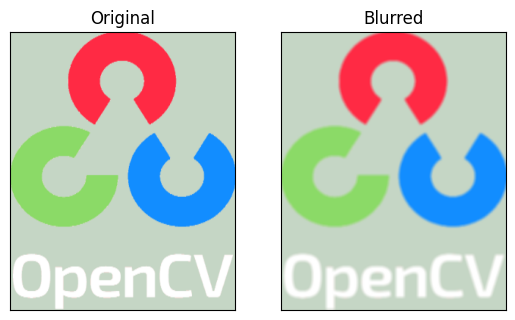

In [39]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread('/content/drive/MyDrive/OpenCV_logo_white_.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blur = cv2.blur(image, (5, 5))

plt.subplot(121), plt.imshow(image), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])

### Сглаживание по Гауссу

В этом методе сглаживания/размытия вместо блочного фильтра используется ядро ​​Гаусса. Размытие реализуется с помощью функции `GaussianBlur`.

В качестве параметров необходимо передать ширину и высоту ядра, которые должны быть неотрицательными и нечетными. Также необходимо указать СКО по направлениям X, Y. В случае, если указано одно значение для СКО, то второе значение принимается таким же. Если оба значения СКО заданы как нули, то они вычисляются из размера ядра. Размытие по Гауссу очень эффективно удаляет гауссовский шум с изображения 👀.

Ядро ​​Гаусса можно создать с помощью функции `getGaussianKernel`.


(<Axes: >, <matplotlib.image.AxesImage at 0x7916d06d62c0>)

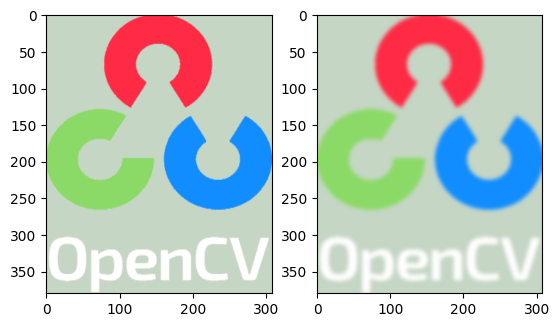

In [40]:
blur = cv2.GaussianBlur(image, (15, 15), 0)

plt.subplot(121), plt.imshow(image, "gray")
plt.subplot(122), plt.imshow(blur, "gray")

### Медианная фильтрация

Для реализации процедуры медианной фильтрации OpenCV предоставляет метод `medianBlur`, который работает следующим образом:

Окно заданного размера проходится по каждому пикселю и присваивает пикселю значение медианы в окрестности.
Интересно отметить, что в приведенных выше фильтрах центральным элементом является вновь вычисленное значение, которое может быть как значением пикселя в изображении, так и новым значением. При медианном же размытии центральный элемент всегда заменяется некоторым значением пикселя изображения. Размер ядра должен быть положительным нечетным целым числом.

(<Axes: >, <matplotlib.image.AxesImage at 0x7916d0bb4b50>)

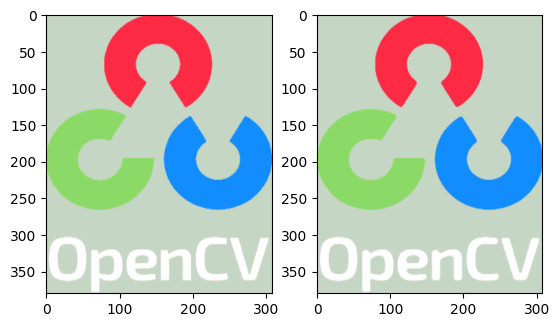

In [41]:
median = cv2.medianBlur(image, 5)

plt.subplot(121), plt.imshow(image, "gray")
plt.subplot(122), plt.imshow(median, "gray")

## Гистограммы в OpenCV 📊

Что же такое гистограмма?

Гистограмму можно рассматривать как график, который дает общее представление о распределении интенсивности пикселей изображения. Это график со значениями пикселей (в диапазоне от 0 до 255) по оси `X` и соответствующим количеством пикселей в изображении по оси `Y`.

На самом деле это просто иной способ понимания изображения. Глядя на гистограмму изображения, вы получаете интуитивное представление о контрасте, яркости, распределении интенсивности и т.д. для этого изображения.



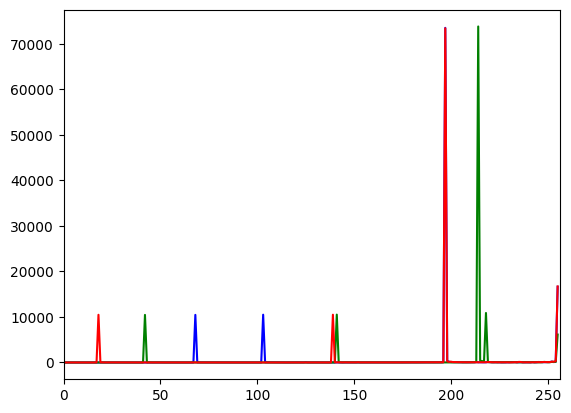

In [42]:
image = cv2.imread('/content/drive/MyDrive/OpenCV_logo_white_.png')

color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.show()

## Функции рисования в OpenCV 🤯

Во всех нижеперечисленных функциях вы увидите некоторые повторяющиеся аргументы:

*   `img`: изображение, на котором вы хотите нарисовать фигуры
*   `color`: Цвет фигуры. Для BGR передавайте его как кортеж, например: $(255,0,0)$ для синего. Для изображения в оттенках серого передавайте скалярное значение.
*   `thickness`: Толщина линии или круга и т.п. Если для замкнутых фигур, таких как, например, круги, передано значение -1 , то произойдет заполнение фигуры указанным цветом. Значение по умолчанию 1.
*   `lineType`: Тип линии, подробности в документации.

### Рисуем линию

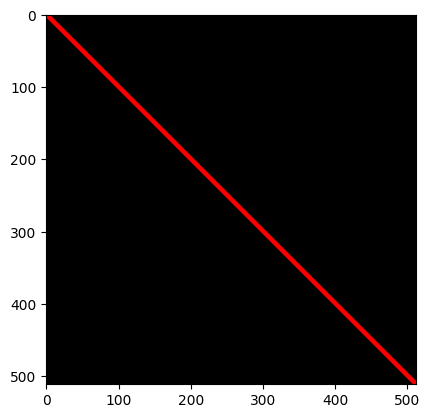

In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = np.zeros((512, 512, 3), np.uint8)
cv2.line(image, (0,0), (511,511), (255, 0, 0), 5)

plt.imshow(image, "gray")

### Рисуем прямоугольник

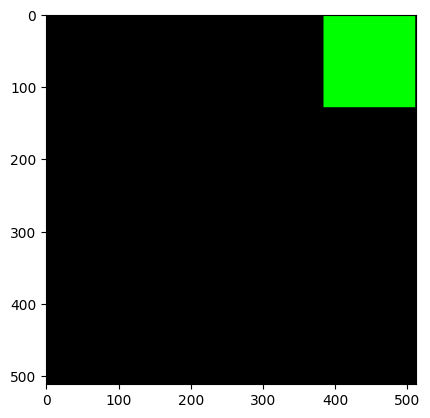

In [46]:
image = np.zeros((512, 512, 3), np.uint8)
cv2.rectangle(image, (384, 0), (510, 128), (0, 255, 0), -1)

plt.imshow(image, "gray")

### Рисуем круг

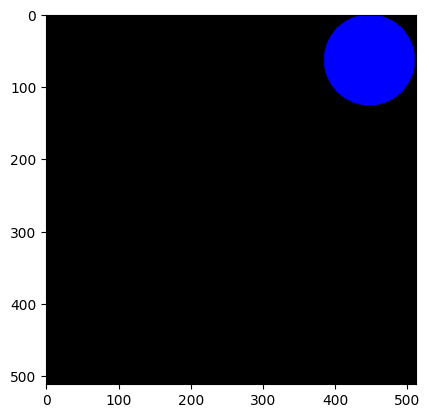

In [47]:
image = np.zeros((512, 512, 3), np.uint8)
cv2.circle(image, (447, 63), 63, (0, 0, 255), -1)

plt.imshow(image, "gray")

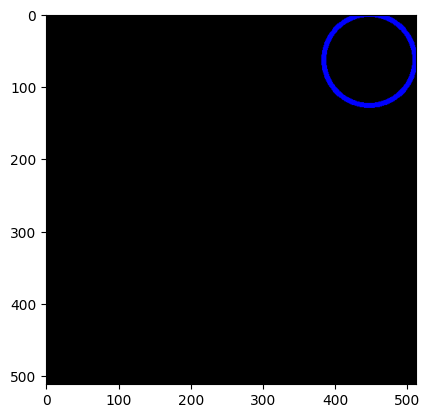

In [48]:
image = np.zeros((512, 512, 3), np.uint8)
cv2.circle(image, (447, 63), 63, (0, 0, 255), 5)

plt.imshow(image, "gray")

### Добавляем текст

Для того, чтобы поместить какой-либо текст на ваше изображение, вам нужно задать следующие параметры:



*   Текст, который вы хотите поместить на изображение
*   Координаты положения текста (левый нижний угол начала данных)
*   Тип шрифта (`Font Type`)
*   Масштаб шрифта (`Font Scale`, устанавливает размер шрифта)  
*   Цвет текста, толщина и т.п.


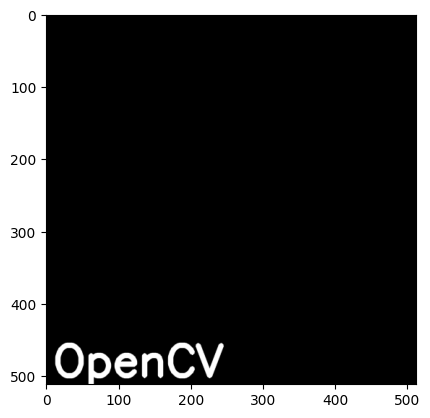

In [49]:
font = cv2.FONT_HERSHEY_SIMPLEX

image = np.zeros((512, 512, 3), np.uint8)
cv2.putText(image, 'OpenCV', (10, 500), font, 2, (255, 255, 255), 5, cv2.LINE_AA)

plt.imshow(image, "gray")

## Работа с видеопоследовательностями

Рассмотрим:


*   чтение, отображение и сохранение видеопоследовательности
*   захват видеопотока с камеры и его отображение



### Захват с камеры

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0) # захват с основной камеры
ret, frame = cap.read()

while ret:
  gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  cv2.imshow("grayscale frame", gray_image)
  key = cv2.waitKey(1)

  if key == ord('q') or key == ord('Q'):
    break
  if key == ord('p'):
    key = cv2.waitKey(0)

  ret, frame = cap.read()

cap.release()
cv2.destroyWindow("grayscale frame")

### Захват с видео

In [ ]:
import cv2
import numpy as np

path_to_video = r""

cap = cv2.VideoCapture(path_to_video) # захват с видео
ret, frame = cap.read()

while ret:
  gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  cv2.imshow("grayscale frame", gray_image)
  key = cv2.waitKey(1)

  if key == ord('q') or key == ord('Q'):
    break
  if key == ord('p'):
    key = cv2.waitKey(0)

  ret, frame = cap.read()

cap.release()
cv2.destroyAllWindows()

### Сохранение видео

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
ret, frame = cap.read()

# print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fourcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv2.VideoWriter('output.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while ret:
    out.write(frame)

    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)

    if key == ord('p'):
        key = cv2.waitKey(0)
    if key == ord('q') or key == ord('Q'):
        break

    ret, frame = cap.read()

out.release()
cap.release()
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite("test.png", image)